구글 드라이브와 colab을 연동시켜 dataset을 불러오는 과정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os.path
malware_name = "malware_%d_API.txt"
benign_name = "benign_%d_API.txt"
path = "/content/drive/My Drive/API_CALLS/"
os.chdir(path)
print(os.getcwd())
data = []
dll = ""
for i in range(1,101):
  if not os.path.isfile(benign_name%i):
    continue
  APIs = []
  file = open(benign_name%i,'r')
  for line in file:
    l = line[:-1].split('\t')
    if len(l) != 2:
      dll = l[0]
      continue
    elif l[0] == 'name':
      continue
    APIs.append("%s:%s"%(dll,l[0]))
  data.append([list(set(APIs)),"0"])

for i in range(1,101):
  if not os.path.exists(malware_name%i):
    continue
  APIs = []
  file = open(malware_name%i,'r')
  for line in file:
    l = line[:-1].split('\t')
    if len(l) != 2:
      dll = l[0]
      continue
    elif l[0] == 'name':
      continue
    APIs.append("%s:%s"%(dll,l[0]))
  data.append([list(set(APIs)),"1"])




/content/drive/My Drive/API_CALLS


In [ ]:
for items in data:
  print(items)

[['api-ms-win-crt-string-l1-1-0.dll:strncpy_s', 'vccorlib140_app.DLL:?Equals@Object@Platform@@QE$AAA_NPE$AAV12@@Z', 'MSVCP140_APP.dll:?sputc@?$basic_streambuf@_WU?$char_traits@_W@std@@@std@@QEAAG_W@Z', 'MSVCP140_APP.dll:_Wcscoll', 'MSVCP140_APP.dll:_Cnd_wait', 'api-ms-win-crt-runtime-l1-1-0.dll:_cexit', 'vccorlib140_app.DLL:??0DisconnectedException@Platform@@QE$AAA@XZ', 'MSVCP140_APP.dll:_Cnd_destroy_in_situ', 'api-ms-win-crt-convert-l1-1-0.dll:_wtoi', 'vccorlib140_app.DLL:?EventSourceInitialize@Details@Platform@@YAXPEAPEAX@Z', 'MSVCP140_APP.dll:??0?$basic_ostream@_WU?$char_traits@_W@std@@@std@@QEAA@PEAV?$basic_streambuf@_WU?$char_traits@_W@std@@@1@_N@Z', 'MSVCP140_APP.dll:_Mtx_init_in_situ', 'vccorlib140_app.DLL:?get@Message@Exception@Platform@@QE$AAAPE$AAVString@3@XZ', 'MSVCP140_APP.dll:?imbue@?$basic_streambuf@_WU?$char_traits@_W@std@@@std@@MEAAXAEBVlocale@2@@Z', 'MSVCP140_APP.dll:?_ReportUnobservedException@details@Concurrency@@YAXXZ', 'MSVCP140_APP.dll:?_Xbad_function_call@std@@YA

In [ ]:
X_data = [item[0] for item in data]
y_data = [item[1] for item in data]

전체 데이터의 25%를 test data로 이용하고, 남은 data는 training data로 사용

In [ ]:
from sklearn.model_selection import train_test_split

X_train = []    
y_train = []
X_test = []
y_test = []

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 1)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

135
135
45
45


In [ ]:
max = 0
for d in X_data:
  if len(d)> max:
    max = len(d)
  
print(max)

1463


Data를 모두 읽어 각 파일에서 사용하는 API들을 모두 추출해 전체 API의 list를 구축

In [ ]:
ALL_APIS = []
for a_file in data:
    for api in a_file[0]:
      print(api)
      ALL_APIS.append(api)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
KERNEL32.DLL:GetEnvironmentStrings
GDI32.dll:GetBkColor
USER32.dll:TranslateAcceleratorA
KERNEL32.DLL:Sleep
KERNEL32.DLL:SetFilePointer
KERNEL32.DLL:GlobalFindAtomA
USER32.dll:GetTopWindow
KERNEL32.DLL:FindResourceA
ole32.dll:CLSIDFromString
KERNEL32.DLL:FindClose
GDI32.dll:FillRgn
KERNEL32.DLL:GetCPInfo
KERNEL32.DLL:UnhandledExceptionFilter
GDI32.dll:Rectangle
USER32.dll:SetCursor
USER32.dll:IsIconic
KERNEL32.DLL:GetVersion
KERNEL32.DLL:FreeLibrary
USER32.dll:GetMessageTime
WS2_32.dll:WSACleanup
USER32.dll:GetWindowTextLengthA
USER32.dll:CreateIconFromResourceEx
GDI32.dll:SetViewportExtEx
WS2_32.dll:__WSAFDIsSet
OLEAUT32.dll:LoadTypeLib
WS2_32.dll:bind
KERNEL32.DLL:GetStringTypeW
USER32.dll:ScrollWindowEx
GDI32.dll:CreateRectRgnIndirect
USER32.dll:LoadIconA
ADVAPI32.dll:RegCloseKey
ole32.dll:OleRun
GDI32.dll:SelectClipRgn
KERNEL32.DLL:GetFullPathNameA
GDI32.dll:ScaleViewportExtEx
KERNEL32.DLL:GetStartupInfoA
USER32.dll:CloseClipboard
USER32.dll:GetF

각 API가 파일들에서 등장하는 횟수를 측정해 dictionary 형태로 저장하는 과정

In [ ]:
from collections import Counter
api_cnt = Counter([item for item in ALL_APIS])
print(api_cnt)

Counter({'KERNEL32.dll:CloseHandle': 70, 'KERNEL32.dll:GetProcAddress': 69, 'KERNEL32.dll:GetLastError': 68, 'USER32.dll:ShowWindow': 66, 'KERNEL32.dll:GetCurrentProcess': 66, 'KERNEL32.dll:WaitForSingleObject': 65, 'KERNEL32.dll:WriteFile': 65, 'USER32.dll:GetWindowRect': 65, 'KERNEL32.dll:FreeLibrary': 65, 'KERNEL32.dll:MultiByteToWideChar': 64, 'GDI32.dll:DeleteObject': 64, 'USER32.dll:DestroyWindow': 64, 'USER32.dll:SetWindowPos': 64, 'KERNEL32.dll:ExitProcess': 64, 'KERNEL32.dll:LoadLibraryA': 63, 'GDI32.dll:SelectObject': 63, 'USER32.dll:EnableWindow': 63, 'USER32.dll:GetClientRect': 62, 'KERNEL32.dll:FindClose': 62, 'KERNEL32.dll:ReadFile': 61, 'KERNEL32.dll:GetModuleHandleA': 61, 'KERNEL32.dll:SetFilePointer': 60, 'KERNEL32.dll:GetModuleFileNameA': 60, 'KERNEL32.dll:Sleep': 59, 'USER32.dll:GetDlgItem': 58, 'USER32.dll:GetSystemMetrics': 57, 'GDI32.dll:GetDeviceCaps': 56, 'KERNEL32.dll:GlobalAlloc': 56, 'KERNEL32.dll:SetFileTime': 55, 'USER32.dll:TranslateMessage': 55, 'USER32.d

In [ ]:
import operator
api_clip = sorted(api_cnt.items(),key=operator.itemgetter(1))
for key in api_clip:
  print(key)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
('api-ms-win-core-path-l1-1-0.dll:PathCchSkipRoot', 1)
('api-ms-win-core-synch-l1-2-0.dll:WaitOnAddress', 1)
('api-ms-win-rtcore-ntuser-winevent-l1-1-0.dll:UnhookWinEvent', 1)
('api-ms-win-rtcore-ntuser-private-l1-1-9.dll:None', 1)
('msvcp_win.dll:??0?$basic_iostream@GU?$char_traits@G@std@@@std@@QEAA@PEAV?$basic_streambuf@GU?$char_traits@G@std@@@1@@Z', 1)
('ntdll.dll:NtQueryInformationToken', 1)
('api-ms-win-oobe-notification-l1-1-0.dll:UnregisterWaitUntilOOBECompleted', 1)
('api-ms-win-core-interlocked-l1-1-0.dll:InterlockedPushEntrySList', 1)
('api-ms-win-core-com-l1-1-0.dll:CoGetContextToken', 1)
('api-ms-win-core-processthreads-l1-1-1.dll:GetProcessMitigationPolicy', 1)
('msvcp_win.dll:?_Schedule_chore@details@Concurrency@@YAHPEAU_Threadpool_chore@12@@Z', 1)
('ntdll.dll:RtlQueryWnfStateData', 1)
('USER32.dll:InternalGetWindowText', 1)
('msvcp_win.dll:?gbump@?$basic_streambuf@GU?$char_traits@G@std@@@std@@IEAAXH@Z', 1)
('api-ms-win-core-synch-l1-2-

In [ ]:
api_clip_dict=  dict(api_clip)

위의 과정을 통해 API list에 등장하는 API의 수에 따라 정렬한 뒤 해당 API list를 index와 함께 dictionary 형태로 구성

In [ ]:
api_dict = dict(zip(api_clip_dict.keys(),range(len(api_clip_dict))))

In [ ]:
api_dict['_PAD_'] = len(api_dict)
api_dict['_UNK_'] = len(api_dict)

In [ ]:
api_rev_dict = dict([v,k] for k, v in api_dict.items())

In [ ]:
def encoding_and_padding(corp_list,dic,max_seq = max + 5):
  from keras.preprocessing.sequence import pad_sequences
  coding_seq = [[dic.get(j,'_UNK_') for j in i] for i in corp_list]
  return(pad_sequences(coding_seq,maxlen=max_seq,padding='pre',truncating='pre',value=dic['_PAD_']))

위에서 구축한 API dictionary를 이용해 training data와 test data의 API를 index로 변환하여 각 파일에서의 API list를 vector형태로 변환

In [ ]:
import numpy as np

x_train = encoding_and_padding(X_train,api_dict)
print(x_train.shape)
print(type(x_train))
y_train = np.array(y_train)
print(y_train.shape)
print(type(y_train))

(135, 1468)
<class 'numpy.ndarray'>
(135,)
<class 'numpy.ndarray'>


In [ ]:
from keras.models import *
from keras.layers import *
from keras.utils import *
from keras.optimizers import *
from keras.callbacks import *
from keras.layers import merge
from keras.layers.core import *
from keras.layers.recurrent import LSTM
from keras.models import *
import pandas as pd
import keras.backend as K

아래의 함수를 이용해 malware와 benign파일의 분류를 돕는 model을 구축하고 test

In [ ]:
def mkmodel():
  x_dim = x_train.shape[1]
  inputs = Input(shape=(x_dim,),name='input')
  embeddings_out = Embedding(input_dim=len(api_dict),output_dim=50,name='embedding')(inputs)
  conv0 = Conv1D(32,1,padding='same')(embeddings_out)
  conv1 = Conv1D(16,2,padding='same')(embeddings_out)
  conv2 = Conv1D(8,3,padding='same')(embeddings_out)
  pool0 = AveragePooling1D()(conv0)
  pool1 = AveragePooling1D()(conv1)
  pool2 = AveragePooling1D()(conv2)
  concat_layer = concatenate([pool0,pool1,pool2],axis=2)
  bidir = Bidirectional(GRU(10,recurrent_dropout=0.2,dropout=0.2))(concat_layer)
  out = Dense(1,activation='sigmoid')(bidir)
  model = Model(inputs=[inputs,],outputs=out)
  return model

In [ ]:
model0 = mkmodel()

In [ ]:
model0.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 1468)         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1468, 50)     319950      input[0][0]                      
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 1468, 32)     1632        embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 1468, 16)     1616        embedding[0][0]                  
____________________________________________________________________________________________

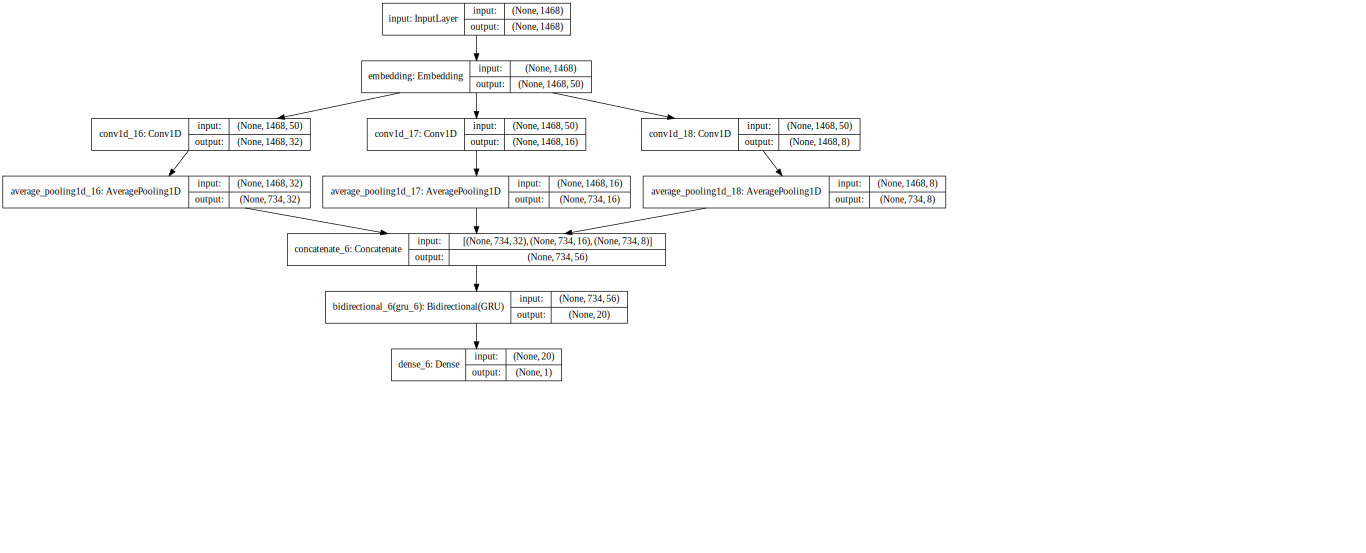

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model0, show_shapes=True, dpi = 50).create(prog='dot', format='svg'))

In [ ]:
model0 = mkmodel()

In [ ]:
model0.compile(optimizer='RMSprop',loss='binary_crossentropy')

아래의 함수를 이용해 loss가 nan이 되지 않도록 하되, 가능한 정확도를 높여줌

In [ ]:
import copy
cnt = 0
hist1 = model0.fit(x = x_train, y = y_train,batch_size = 200, epochs = 2, validation_split=0.1)

while (not pd.isnull(hist1.history['loss'][len(hist1.history['loss']) - 1])) and (hist1.history['loss'][len(hist1.history['loss']) - 1] <= hist1.history['loss'][len(hist1.history['loss']) - 2]):
  model1 = copy.deepcopy(model0)
  hist = copy.deepcopy(hist1)
  hist1 = model0.fit(x = x_train, y = y_train,batch_size = 200, epochs = 1, validation_split=0.1)

model0 = model1

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 121 samples, validate on 14 samples
Epoch 1/2
121/121 [==============================] - 2s 20ms/step - loss: 0.6923 - val_loss: 0.6808
Epoch 2/2
121/121 [==============================] - 1s 11ms/step - loss: 0.6804 - val_loss: 0.6754
Train on 121 samples, validate on 14 samples
Epoch 1/1
121/121 [==============================] - 1s 11ms/step - loss: 0.6648 - val_loss: 0.6668
Train on 121 samples, validate on 14 samples
Epoch 1/1
121/121 [==============================] - 1s 11ms/step - loss: 0.6518 - val_loss: 0.6562
Train on 121 samples, validate on 14 samples
Epoch 1/1
121/121 [==============================] - 1s 11ms/step - loss: 0.6315 - val_loss: 0.6452
Train on 121 samples, validate on 14 samples
Epoch 1/1
121/121 [==============================] - 1s 11ms/step - loss: 0.6193 - val_loss: 0.6374
Train on 121 samples, validate on 14 samples
Epoch 1/1
121/121 [==============================] - 1s 11ms/step - loss: 0.6007 - val_loss: 0.6256
Train on 121 samples, validate

In [ ]:
print(type(hist.history['loss'][-1]))
print(hist.history['loss'][-1])
print(np.nan)
print(type(np.nan))
print(pd.isnull(hist.history['loss'][-1]))

<class 'numpy.float64'>
0.19836343824863434
nan
<class 'float'>
False


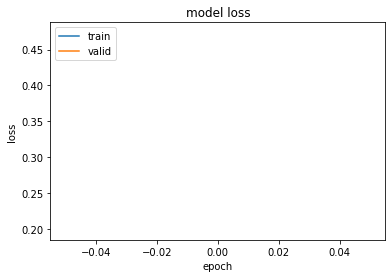

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'],loc='upper left')
plt.show()

In [ ]:
x_test = encoding_and_padding(X_test,api_dict)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((45, 1468), (45,))

In [ ]:
pred = model0.predict(x_test)

In [ ]:
pred = [round(val[0]) for val in pred]
y_test = [float(val) for val in y_test]
correct = 0

for i in range(len(y_test)):
  print(str(pred[i])+"\t"+str(y_test[i]))
  if pred[i] == y_test[i]:
    correct+=1

print("Score: %d/%d"%(correct,len(y_test)))

0.0	1.0
1.0	1.0
1.0	1.0
1.0	1.0
1.0	0.0
0.0	0.0
0.0	0.0
0.0	0.0
1.0	1.0
1.0	1.0
0.0	1.0
1.0	1.0
0.0	0.0
1.0	1.0
0.0	0.0
1.0	1.0
0.0	0.0
1.0	1.0
0.0	0.0
1.0	1.0
1.0	1.0
1.0	0.0
0.0	0.0
1.0	1.0
0.0	0.0
0.0	0.0
0.0	0.0
0.0	0.0
0.0	1.0
0.0	0.0
0.0	0.0
1.0	1.0
0.0	0.0
1.0	1.0
0.0	0.0
1.0	1.0
1.0	1.0
1.0	0.0
0.0	0.0
0.0	1.0
1.0	1.0
1.0	1.0
1.0	0.0
1.0	1.0
1.0	0.0
Score: 36/45


아래의 함수를 이용해 Grad_Cam와 같이 사용
But, 현재 input의 형태가 이상한 것으로 판단. base가 된 post에서는 각 item별로 grad_cam을 적용가능했으나 현 모델에서는 test data전체를 입력하여 결과가 나오므로 어떤 결과가 등장하는 것인지 정확하게 판단하기가 불가능함.

In [ ]:
def grad_cam_conv1D(model, layer_nm, x, sample_weight=1,  keras_phase=0):
    import keras.backend as K
    import numpy as np
    
    #레이어 이름에 해당되는 레이어 정보를 가져옴 
    input = model.input
    print(input)
    layers = model.get_layer(layer_nm)
    layers_wt = layers.weights
    layers_weights = layers.get_weights()
    

    #긍정 클래스를 설명할 수 있게 컨볼루션 필터 가중치의 gradient를 구함  
    grads = K.gradients(model.output[:,0], layers_wt)[0]

    
    #필터별로 가중치를 구함 
    pooled_grads = K.mean(grads, axis=(0,1))
    input_tensor = [input,model.sample_weights[0], K.learning_phase()]
    output_tensor = [pooled_grads, layers.output[0]]

    get_pooled_grads = K.function(input_tensor, output_tensor)

    pooled_grads_value, conv_layer_output_value = get_pooled_grads([[x,], [sample_weight,], keras_phase])
    #다시한번 이야기 하지만 loss를 줄이기 위한 학습과정이 아니다... 
    for i in range(conv_layer_output_value.shape[-1]):
        conv_layer_output_value[:, i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = heatmap + heatmap.min()
    heatmap = heatmap / heatmap.max()

    return((heatmap, pooled_grads_value))

In [ ]:
hm1,graded1 = grad_cam_conv1D(model0,'conv1d_19',x_test)
hm2,graded2 = grad_cam_conv1D(model0,'conv1d_20',x_test)
hm3,graded3 = grad_cam_conv1D(model0,'conv1d_21',x_test)


Tensor("input_60:0", shape=(None, 1468), dtype=float32)
Tensor("input_60:0", shape=(None, 1468), dtype=float32)
Tensor("input_60:0", shape=(None, 1468), dtype=float32)


In [ ]:
print(len(hm1))

1468


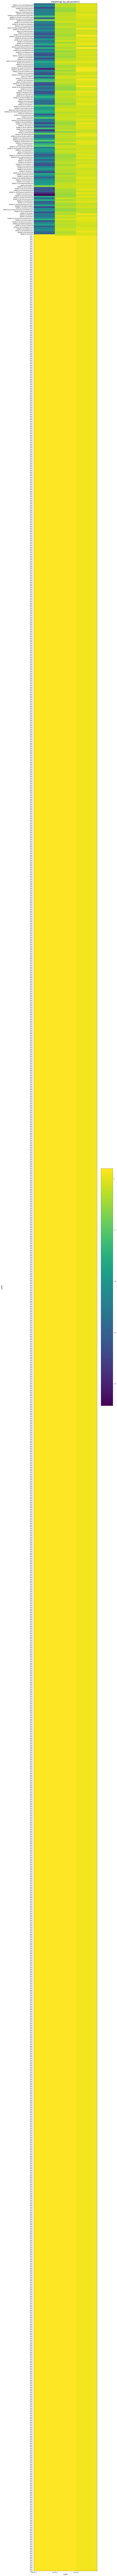

In [ ]:
test_tbl = pd.DataFrame({'conv1d_1':hm1,'conv1d_2':hm2,'conv1d_3':hm3})
kw = [api_rev_dict[i] for i in x_test[0]]

plt.rcParams["figure.figsize"] = (12,400)
plt.pcolor(test_tbl)
plt.xticks(np.arange(0,4,1),["conv1d_1","conv1d_2","conv1d_3"])
plt.yticks(np.arange(0,len(test_tbl.index),1),kw)
plt.title('Heatmap by plt.pcolor()',fontsize=20)
plt.xlabel('Layer',fontsize=  14)
plt.ylabel('Label',fontsize=14)
plt.colorbar()

plt.show()

In [ ]:
test_tbl1 = pd.DataFrame({'heat':hm1,'kw':[-heat for heat in hm1]})

plt.rcParams["figure.figsize"] = (12,400)
plt.pcolor(test_tbl)
plt.xticks(np.arange(0,2,1),["benign","malware"])
plt.yticks(np.arange(0,len(hm_tbl.index),1),hm_tbl.kw)
plt.title('Heatmap by plt.pcolor()',fontsize=20)
plt.xlabel('API',fontsize=  14)
plt.ylabel('Label',fontsize=14)
plt.colorbar()

plt.show()